In [6]:
import  numpy  as  np
import  pandas  as  pd
from  ast  import  literal_eval
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

dfWaypoint = pd.read_csv("../data/lake_track_waypoints.csv")
dfNormalLogger = pd.read_csv("../data/normal_logger.csv")
dfDistractedTextingLogger = pd.read_csv("../data/distracted_texting_logger.csv")
dfDistractedEatingLogger = pd.read_csv("../data/distracted_eating_logger.csv")

x_waypoint = []
y_waypoint = []
ool_angle = []
for i in range(0, len(dfWaypoint)): 
    x_waypoint.append(dfWaypoint.loc[i, 'x'])
    y_waypoint.append(dfWaypoint.loc[i, 'y'])

x_goodPath = []
y_goodPath = []
x_badPath = []
y_badPath = []
x_badPath2 = []
y_badPath2 = []
dfNormalLogger = dfNormalLogger[:len(dfDistractedLogger)]
for i in range(0, len(dfNormalLogger) - 1): 
    x_goodPath.append(dfNormalLogger.loc[i, 'x'])
    y_goodPath.append(dfNormalLogger.loc[i, 'y'])
    x_badPath.append(dfDistractedTextingLogger.loc[i, 'x'])
    y_badPath.append(dfDistractedTextingLogger.loc[i, 'y'])
    x_badPath2.append(dfDistractedEatingLogger.loc[i, 'x'])
    y_badPath2.append(dfDistractedEatingLogger.loc[i, 'y'])

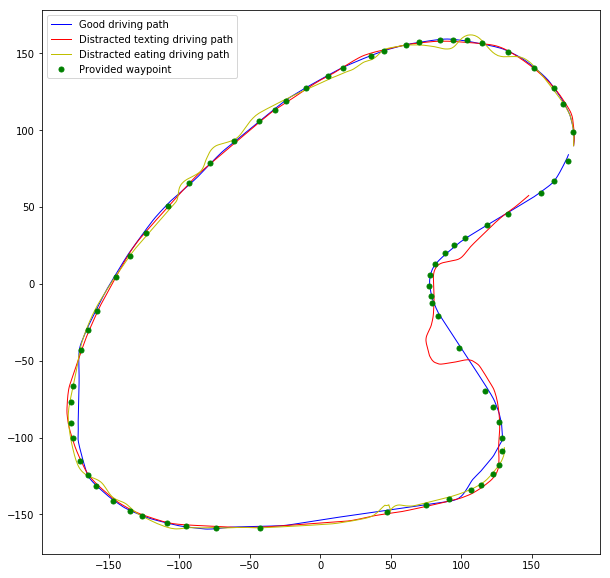

In [13]:
plt.rcParams["figure.figsize"] = [10, 10]
p1 = plt.plot(x_goodPath, y_goodPath, 'b', lw=1.0)
p2 = plt.plot(x_badPath, y_badPath, 'r', lw=1.0)
p3 = plt.plot(x_badPath2, y_badPath2, 'y', lw=1.0)
p4 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)

plt.legend((p1[0],p2[0], p3[0], p4[0]), ('Good driving path','Distracted texting driving path', 'Distracted eating driving path', 'Provided waypoint'))
plt.show()